# Лабораторная работа №9
## Решение краевой задачи второго порядка
#### В работе численно решается уравнение теплопроводности с кусочно непрерывными коэффициентами методом встречной прогонки 
#### В качестве примера выполнена IV Лабораторная работа Вариант 3, задание 1 сборника Демченко В. В.:

$$\dfrac {d}{dx} [k(x) \dfrac {du}{dx}] - q(x)u = - f(x) $$

#### Дополнительные условия в точке разрыва $x_0 = 0.525$:
$$u(x_0 - 0) = u(x_0 + 0)$$
$$k(x_0 - 0)u'(x_0 - 0) = k(x_0 + 0)u'(x_0 + 0)$$
$$x < x_0: ~~ k(x) = x^2 + 1; ~~ q(x) = e^{-x}; ~~ f(x) = 1$$
$$x > x_0: ~~ k(x) = x; ~~ q(x) = e^{-x}; ~~ f(x) = x^3$$

#### Краевые условия:
$$u(0) = 0, ~~~~~u(1) = 1$$

#### Поскольку

$$\left(\frac{d}{dx}\left[k(x)\frac{du}{dx}\right]\right)_{x = x_l} \approx \frac{k_{l+1/2}\displaystyle\frac{u_{l+1} - u_l}{h} - k_{l-1/2}\displaystyle\frac{u_{l} - u_{l-1}}{h}}{h}, \;\;\; l = \overline{1 \div L - 1}$$

#### Дифференциальное уравнение сводится к системе разностых уравнений с трехдиаганальной матрицей, которую удобно решать методом прогонки
#### Однако, поскольку задача имеет точку разрыва, то необходимо использовать метод встречной прогонки, чтобы подойти к точке разрыва от граничных точек

#### График решения представлены ниже.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x_0 = 0; u_0 = 0
x_1 = 1; u_1 = 1
L = 300; step = (x_1 - x_0) / (L - 1)
x_gap = 0.525

def FuncK(x):
    if (x < x_gap):
        return x ** 2 + 1
    else:
        return x

def FuncQ(x):
    return np.exp(-x)

def FuncF(x):
    if (x < x_gap):
        return 1
    else:
        return x ** 3

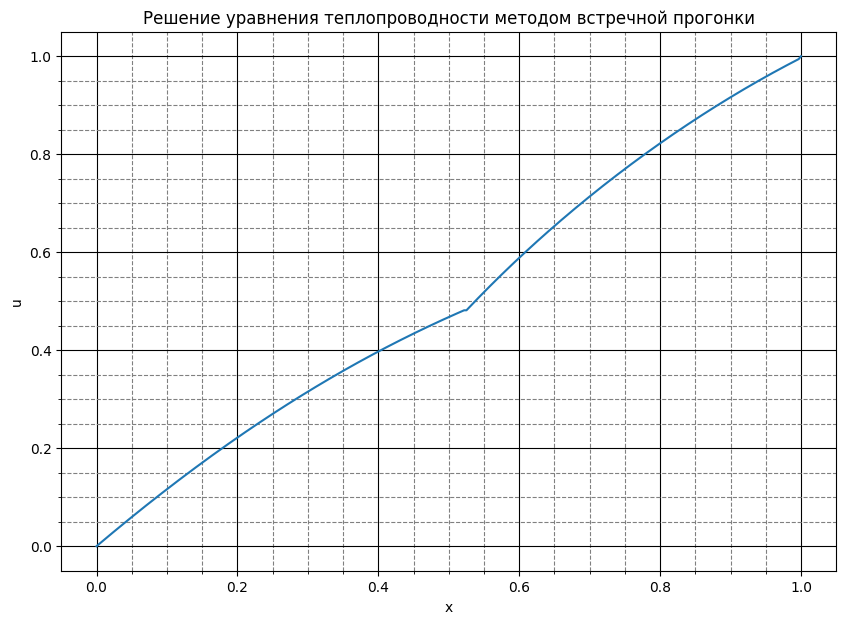

In [64]:
def ForwardRun(x, x_gap):
    a = np.zeros(L); b = np.zeros(L)
    c = np.zeros(L); d = np.zeros(L)

    l_left = int(np.floor(x_gap / step))
    l_right = l_left + 1;

    for l in range(1, L - 1):
        if (l == l_left or l == l_right):
            continue
        k_l = FuncK(x_0 + (l - 0.5) * step)
        k_r = FuncK(x_0 + (l + 0.5) * step)
        a[l] = k_r
        b[l] = -(k_l + k_r) - FuncQ(x[l]) * step ** 2
        c[l] = k_l
        d[l] = -FuncF(x[l]) * step ** 2

    alpha = np.zeros(L); beta = np.zeros(L)

    alpha[1] = - a[1] / b[1]; beta[1] = (d[1] - c[1] * u_0) / b[1]
    for l in range(2, l_left):
        alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
        beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])

    alpha[L - 2] = -c[L - 2] / b[L - 2]; beta[L - 2]  = (d[L - 2] - c[L - 2] * u_1) / b[L - 2]
    for l in reversed(range(l_right + 1, L - 2)):
        alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
        beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

    return [alpha, beta]

def ReverseRun(alpha, beta, x, x_gap):
    l_left = int(np.floor(x_gap / step))
    l_right = l_left + 1;

    k_l = FuncK(x[l_left])
    k_r = FuncK(x[l_right])

    u = np.zeros(L)
    u[0] = u_0; u[L - 1] = u_1
    u[l_left] = u[l_right] = (k_l * beta[l_left - 1] + k_r * beta[l_right + 1]) /             \
                             (k_l * (1 - alpha[l_left - 1]) + k_r * (1 - alpha[l_right + 1]))

    for l in range(l_left - 1, 0, -1):
        u[l] = alpha[l] * u[l + 1] + beta[l]

    for l in range(l_right + 1, L - 1):
        u[l] = alpha[l] * u[l - 1] + beta[l]

    return u;

def OncomingTridiagonalAlgorithm(x, x_gap):
    alpha, beta = ForwardRun(x, x_gap)
    return ReverseRun(alpha, beta, x, x_gap)

def PlotGraph(x, u):
    fig, ax = plt.subplots(figsize=[10, 7])
    ax.set_title("Решение уравнения теплопроводности методом встречной прогонки")
    ax.set_xlabel("x")
    ax.set_ylabel("u")

    ax.plot(x, u)

    plt.minorticks_on()
    plt.grid(which='major', color='black', linestyle='-')
    plt.grid(which='minor', color='0.5', linestyle='--')

def main():
    x = np.zeros(L)
    for l in range(0, L):
        x[l] = x_0 + l * step

    u = OncomingTridiagonalAlgorithm(x, x_gap)
    PlotGraph(x, u)


main()